In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import time
import random
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
e1 = np.load("ErrorNumpy1.npy")
e2 = np.load("ErrorNumpy2.npy")

initialstate = np.squeeze(np.array([ [-0.527029],
                                     [ 0.152074],
                                     [ 1.259488],
                                     [ 1.018136],
                                     [ 1.0347  ],
                                     [-0.066806],
                                     [-0.221626],
                                     [ 0.303806],
                                     [-0.0323  ],
                                     [ 0.45862 ],
                                     [-1.113736],
                                     [ 0.702659]]))


In [3]:
e1_n = np.zeros((12,10,12))
e2_n = np.zeros((12,10,12))

for q in range(0, 12):
    for simu in range(0, 10):
        e1_n[q , simu, :] = np.abs( np.divide(e1[q, simu, :] , initialstate) ) * 100
        e2_n[q , simu, :] = np.abs( np.divide(e1[q, simu, :] , initialstate) ) * 100

In [4]:
e1_av = np.sum(e1_n, axis = 2) / 12
e2_av = np.sum(e2_n, axis = 2) / 12

In [5]:
e1_min = np.amin(e1_av, axis = 1) 
e2_min = np.amin(e2_av, axis = 1) 


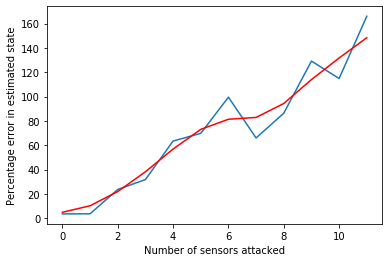

In [6]:
plt.plot(e2_min)
smoothed = gaussian_filter1d( e2_min , sigma=1)
plt.plot(smoothed, color = 'r')
plt.xlabel("Number of sensors attacked")
plt.ylabel("Percentage error in estimated state")
plt.show()